**CLASSIFICATION**

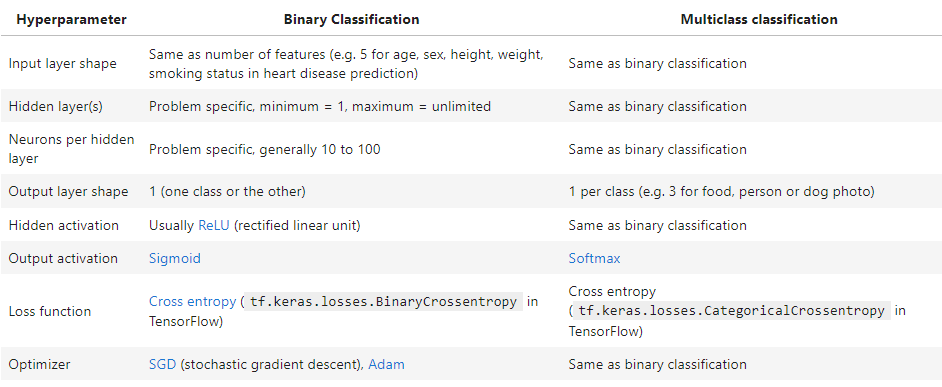

In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_circles
n_samples = 1000

X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
pd.DataFrame({"X0": X[:,0] , "X1": X[:,1] , "label": y})

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


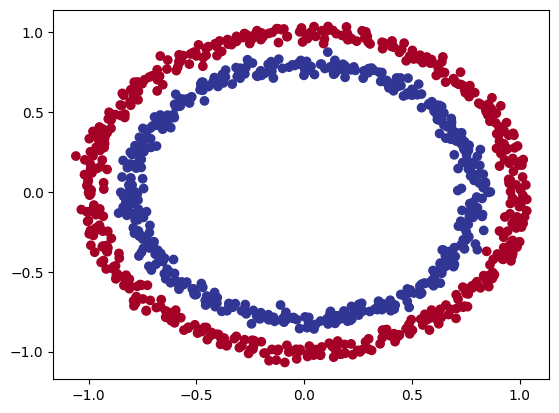

In [7]:
plt.scatter(X[: , 0] , X[: , 1], c = y , cmap=plt.cm.RdYlBu);

In [8]:
X.shape , y.shape

((1000, 2), (1000,))

Model Training

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.3288 - accuracy: 0.4885
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7934 - accuracy: 0.4992
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7123 - accuracy: 0.4963
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.5009


In [10]:
model.evaluate(X,y) 

32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4994


[0.6943487524986267, 0.49940624833106995]

In [11]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=100,verbose=2)

Epoch 1/100
32/32 - 1s - loss: 0.8817 - accuracy: 0.4808 - 755ms/epoch - 24ms/step
Epoch 2/100
32/32 - 0s - loss: 0.6937 - accuracy: 0.5151 - 46ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 0.6973 - accuracy: 0.4775 - 50ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6954 - accuracy: 0.4840 - 48ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.6944 - accuracy: 0.5082 - 41ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 0.6930 - accuracy: 0.5271 - 42ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.6958 - accuracy: 0.4864 - 43ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.6955 - accuracy: 0.4886 - 44ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.6953 - accuracy: 0.4939 - 54ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.6937 - accuracy: 0.5044 - 49ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.6954 - accuracy: 0.4962 - 41ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.6961 - accuracy: 0.5091 - 39ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s

In [12]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5000


[0.6971544623374939, 0.5]

In [13]:
x1 = model_1.predict(X)

32/32 [==============================] - 0s 2ms/step


In [14]:
def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing multiclass classification


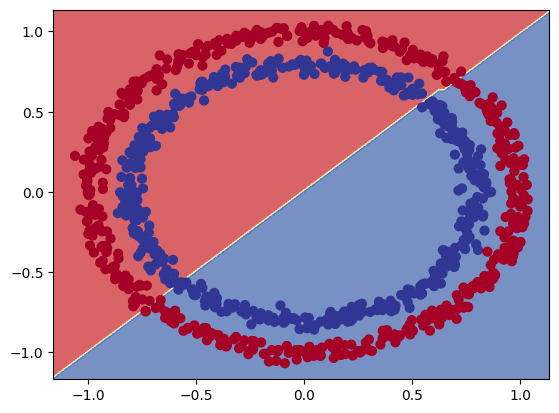

In [15]:
plot_decision_boundary(model=model_1, X=X, y=y)

Model for Regression problem

In [16]:
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)    # y = X + 100

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [17]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 403.6360 - mae: 403.6360
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 278.0978 - mae: 278.0978
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 157.3732 - mae: 157.3732
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 52.8726 - mae: 52.8726
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 82.2736 - mae: 82.2736
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 83.4238 - mae: 83.4238
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 50.2871 - mae: 50.2871
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 53.6438 - mae: 53.6438
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 48.9735 - mae: 48.9735
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 45.5219 - mae: 45.5219
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 3ms/step


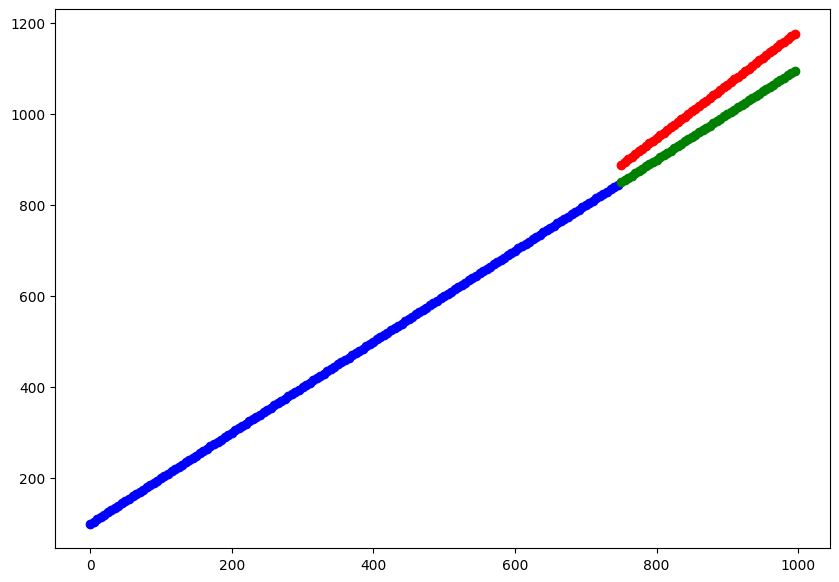

In [18]:
# Make predictions with our trained model
y_reg_preds = model_1.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label = "Testing Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label = "Prediction")

**Non-Linearity**

In [19]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr = 0.001),
                metrics=["accuracy"]
               )

model_2.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2232 - accuracy: 0.4993
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1665 - accuracy: 0.4987
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1007 - accuracy: 0.5004
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0801 - accuracy: 0.4991
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0541 - accuracy: 0.5001
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9776 - accuracy: 0.5016
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9410 - accuracy: 0.4988
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9012 - accuracy: 0.5006
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8930 - accuracy: 0.4991
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8994 - accuracy: 0.4989
Epoch 11/

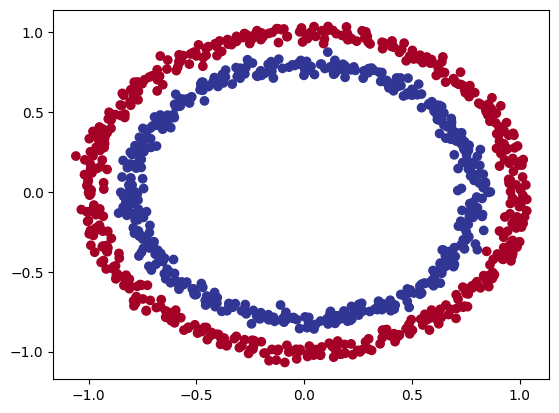

In [20]:
plt.scatter(X[:,0] , X[:,1] , c=y , cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 763us/step
doing multiclass classification


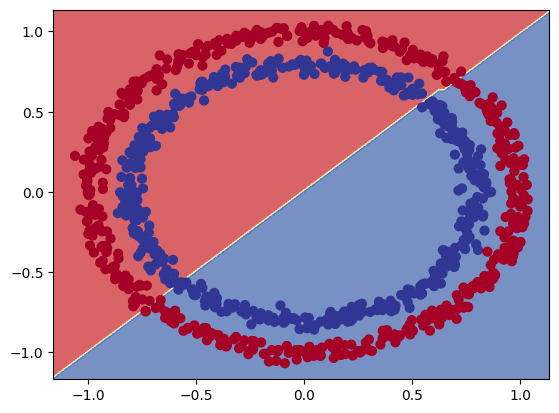

In [21]:
plot_decision_boundary(model=model_2,
                       X=X,
                       y=y)

In [22]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr = 0.001),
                metrics=["accuracy"]
               )

model_3.fit(tf.expand_dims(X,axis=-1),y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.8377 - accuracy: 0.4965
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7823 - accuracy: 0.4967
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.4996
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7463 - accuracy: 0.4988
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7373 - accuracy: 0.4985
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7296 - accuracy: 0.4989
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7229 - accuracy: 0.4968
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7179 - accuracy: 0.4977
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7135 - accuracy: 0.4977
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.7089 - accuracy: 0.4997
Epoch 11/

In [23]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5017


[0.693121075630188, 0.5016562342643738]

313/313 [==============================] - 0s 948us/step
doing multiclass classification


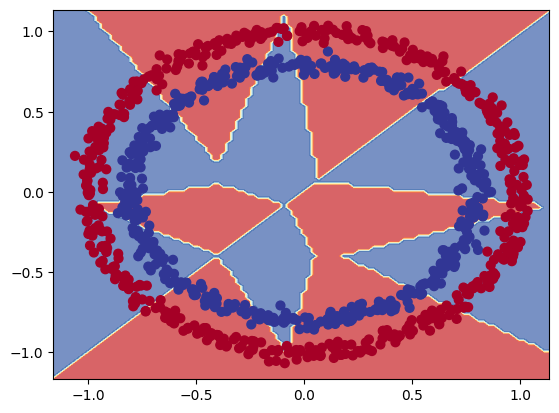

In [24]:
plot_decision_boundary(model=model_3,X=X,y=y)

In [25]:
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5050
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5040
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5050
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5050
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5090
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5100
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5200
Epoch 11/

In [26]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.9130


[0.3600943982601166, 0.9129999876022339]

313/313 [==============================] - 0s 895us/step
doing binary classification


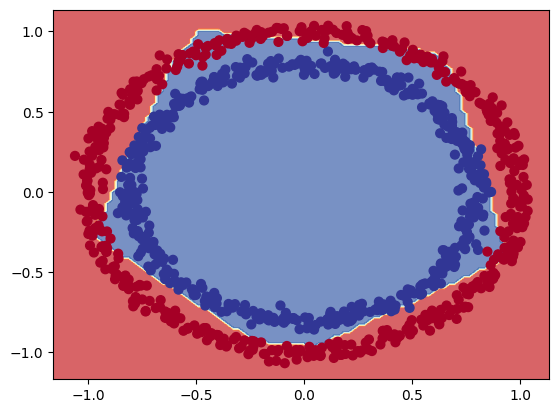

In [27]:
plot_decision_boundary(model=model_4,X=X,y=y)

Linear and Non-Linear functions

In [28]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

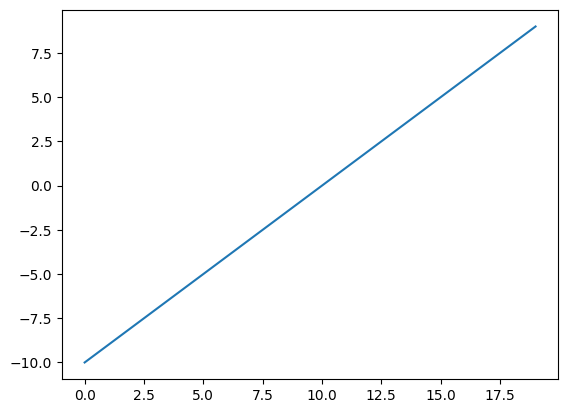

In [29]:
plt.plot(A)

In [30]:
# Sigmoid Function --> sigmoid(x) = 1 / (1+exp(-x))

def sigmoid(x):
    return 1/(1+tf.exp(-x))

sig_A = sigmoid(A)
sig_A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

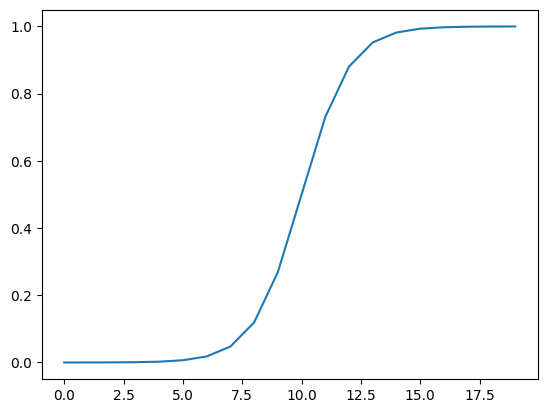

In [31]:
plt.plot(sig_A);

In [32]:
# ReLU Function --> f(x) = max(0,x)

def relu(x):
    return tf.maximum(0,x)

relu_A = relu(A)
relu_A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

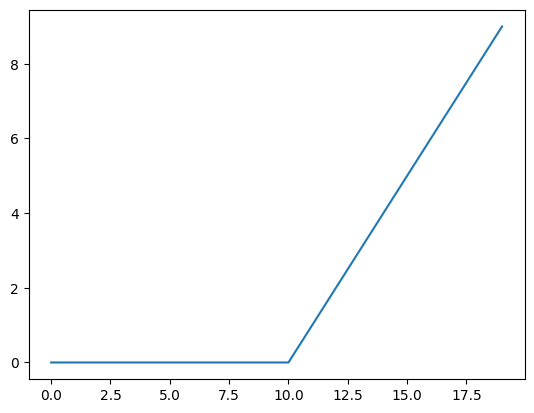

In [33]:
plt.plot(relu_A)

In [34]:
act_A = tf.keras.activations.linear(A)
act_A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

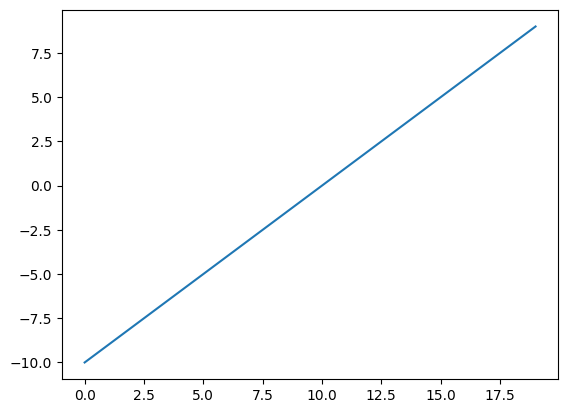

In [35]:
plt.plot(act_A)

In [36]:
A == act_A

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Tweaking the learning rate

In [37]:
len(X)

1000

In [38]:
X_train , y_train =  X[:800] , y[:800]
X_test , y_test = X[800:] , y[800:]

X_train.shape , y_train.shape , X_test.shape , y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [39]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                            
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X_train,y_train, epochs=25)

Epoch 1/25


25/25 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4837
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5300
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5275
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5725
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.5512
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5625
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6507 - accuracy: 0.6375
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6382 - accuracy: 0.6425
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6219 - accuracy: 0.6725
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5932 - accuracy: 0.7188
Epoch 11/25
25/25 [===========

In [40]:
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8700


[0.33375614881515503, 0.8700000047683716]

313/313 [==============================] - 0s 938us/step
doing binary classification
313/313 [==============================] - 0s 789us/step
doing binary classification


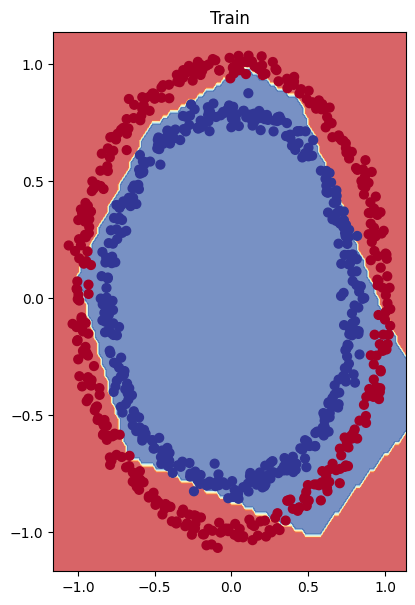

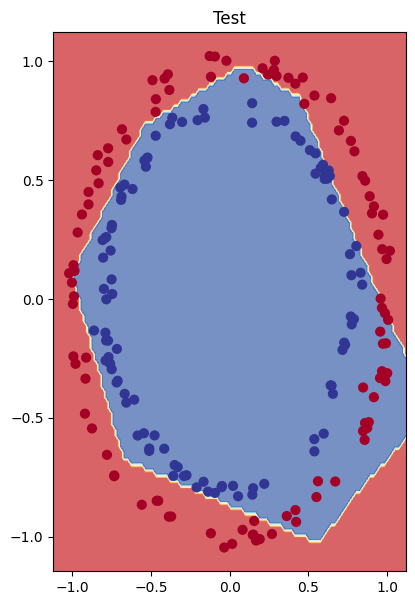

In [41]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_5,X = X_train,y = y_train)

plt.figure(figsize=(10,7))
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_5,X = X_test,y = y_test)

In [42]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 12        
                                                                 
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Using the history function

In [43]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.695406,0.48375
1,0.689388,0.53000
2,0.685718,0.52750
3,0.680300,0.57250
4,0.673856,0.55125
5,0.663334,0.56250
6,0.650650,0.63750
7,0.638228,0.64250
8,0.621926,0.67250
9,0.593165,0.71875


Text(0.5, 1.0, 'Model_5 loss curves')

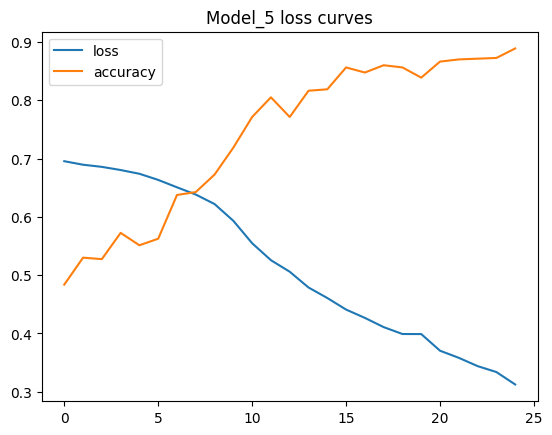

In [44]:
pd.DataFrame(history.history).plot()
plt.title("Model_5 loss curves")

Callbacks

In [45]:
tf.random.set_seed(42)

# Create a model (same as model_5)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_6 = model_6.fit(X_train,
                        y_train, 
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7200 - accuracy: 0.5163 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.5163 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7181 - accuracy: 0.5163 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7171 - accuracy: 0.5163 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7160 - accuracy: 0.5188 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7150 - accuracy: 0.5150 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7138 - accuracy: 0.5163 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7126 - accuracy: 0.5175 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

In [46]:
history_6.history

{'loss': [0.7199903130531311,
  0.7190734148025513,
  0.7181355953216553,
  0.7170931100845337,
  0.716031551361084,
  0.7149829864501953,
  0.7138037085533142,
  0.7126244902610779,
  0.7114033699035645,
  0.7101736664772034,
  0.7089772820472717,
  0.7075870037078857,
  0.7064372301101685,
  0.7050569653511047,
  0.7040104866027832,
  0.7026816010475159,
  0.7015810608863831,
  0.7004509568214417,
  0.6994389295578003,
  0.6983882188796997,
  0.6972918510437012,
  0.6962563991546631,
  0.6953100562095642,
  0.6941770911216736,
  0.693104088306427,
  0.6919169425964355,
  0.6907530426979065,
  0.6892635226249695,
  0.6878416538238525,
  0.6862455010414124,
  0.684396505355835,
  0.6818817257881165,
  0.6790534257888794,
  0.6753169298171997,
  0.6711604595184326,
  0.6645028591156006,
  0.6549816727638245,
  0.6431133151054382,
  0.6290868520736694,
  0.6011197566986084,
  0.5567536354064941,
  0.5214245915412903,
  0.48140808939933777,
  0.453108549118042,
  0.414921373128891,
  0.39

<Axes: xlabel='epochs'>

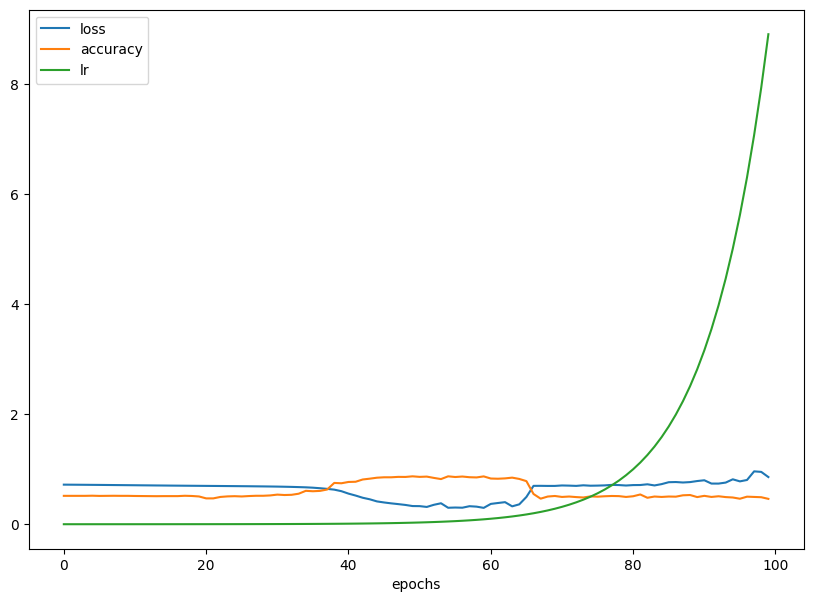

In [47]:
pd.DataFrame(history_6.history).plot(figsize=(10,7), xlabel="epochs")

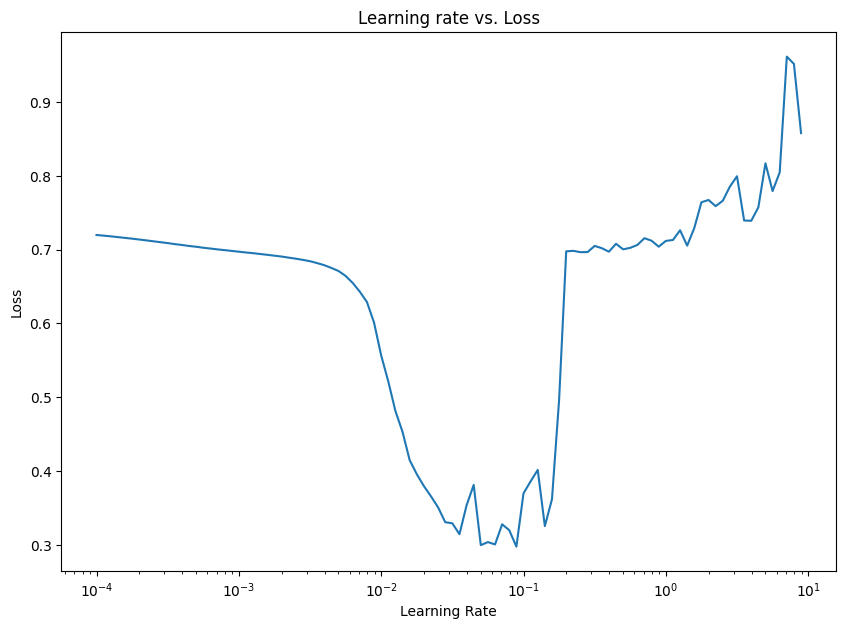

In [48]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))  
plt.semilogx(lrs, history_6.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [49]:
10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [50]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

history_7 = model_7.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.4825
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5312
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5625
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.5900
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.6150
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6051 - accuracy: 0.6375
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.6637
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.7700
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7750
Epoch 11/

In [51]:
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 0.9700


[0.10115164518356323, 0.9700000286102295]

313/313 [==============================] - 0s 840us/step
doing binary classification
313/313 [==============================] - 0s 797us/step
doing binary classification


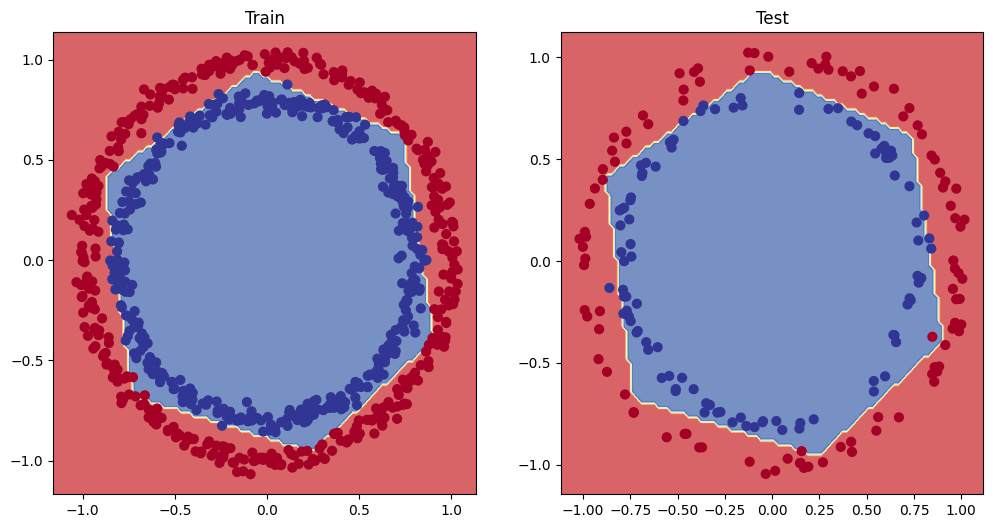

In [52]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, X=X_test, y=y_test)
plt.show()

In [53]:
y_pred = model_7.predict(X_test)

7/7 [==============================] - 0s 1ms/step


In [54]:
y_pred

array([[9.93186951e-01],
       [9.98283625e-01],
       [8.72484982e-01],
       [9.99823928e-01],
       [3.85819972e-02],
       [1.25457200e-05],
       [9.90338385e-01],
       [6.10451877e-07],
       [8.40064764e-01],
       [2.67416164e-02],
       [8.76836360e-01],
       [6.43535284e-04],
       [9.46969807e-01],
       [9.96193647e-01],
       [9.95582402e-01],
       [9.94312942e-01],
       [9.05062020e-01],
       [9.75018322e-01],
       [2.65383106e-02],
       [9.84166622e-01],
       [9.87855856e-06],
       [9.31964457e-01],
       [8.91771495e-01],
       [9.65690017e-01],
       [5.94729036e-02],
       [9.78577018e-01],
       [9.97900069e-01],
       [5.08072339e-02],
       [5.39188599e-03],
       [9.99732375e-01],
       [1.29543096e-01],
       [7.96425641e-01],
       [9.89826620e-01],
       [6.72016246e-03],
       [2.67416164e-02],
       [9.11158621e-01],
       [9.94161010e-01],
       [8.37219715e-01],
       [9.74522710e-01],
       [9.99008000e-01],


In [55]:
tf.round(y_pred)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
 

In [56]:
from sklearn.metrics import confusion_matrix

y_pred = model_7.predict(X_test)
confusion_matrix(y_test,tf.round(y_pred))

7/7 [==============================] - 0s 1ms/step


array([[100,   1],
       [  5,  94]], dtype=int64)

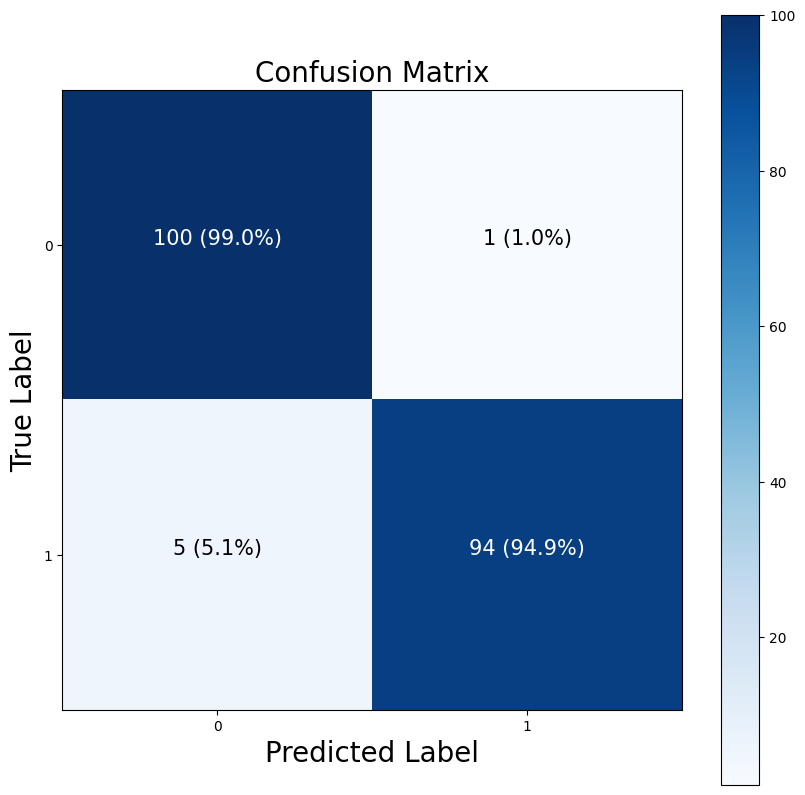

In [57]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels, 
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

**Multiclass Classification**

In [58]:
from tensorflow.keras.datasets import fashion_mnist

(train_data , train_labels) , (test_data , test_labels) = fashion_mnist.load_data()

In [59]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [60]:
train_data[0].shape , train_labels[0].shape

((28, 28), ())

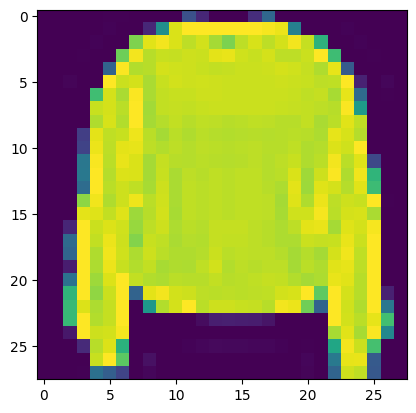

In [61]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [62]:
train_labels[7]

2

In [63]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

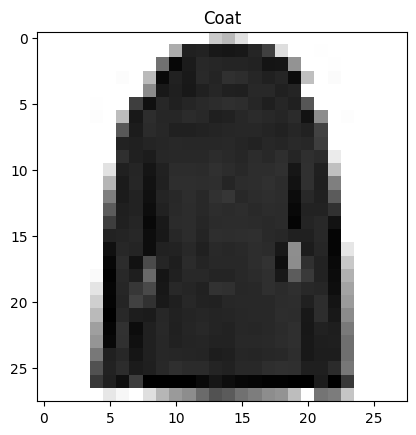

In [64]:
choice = 2000
plt.imshow(train_data[choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[choice]])
plt.show()

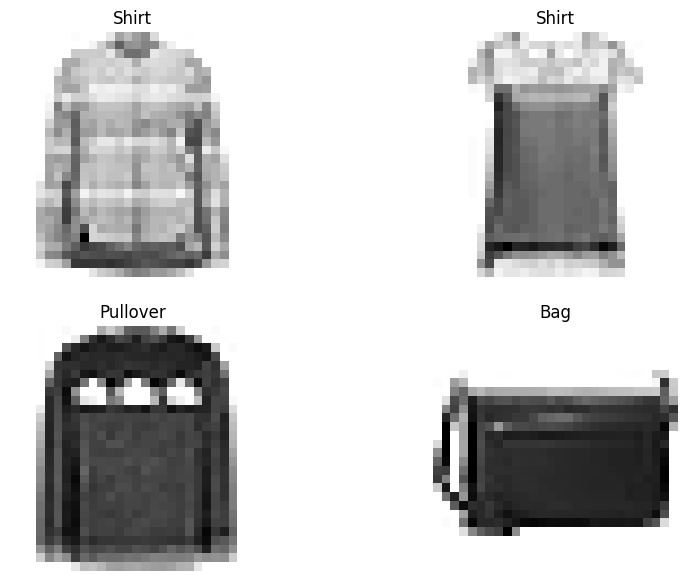

In [65]:
import random
plt.figure(figsize=(10,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)
plt.show()

In [66]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [67]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

Flatten layer multiplies all the nodes present in the layer and make them a single node.
e.g.: (28*28) = (None,784)

In [68]:
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))
     

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.4087 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3033 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3029 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [69]:
train_data_nor = (train_data/255)
test_data_nor = (test_data/255)

train_data_nor.min() , test_data_nor.max()

(0.0, 1.0)

In [70]:
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model 
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model 
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_nor = model_12.fit(train_data_nor,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_nor, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4655 - accuracy: 0.4350 - val_loss: 1.1223 - val_accuracy: 0.5640
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9927 - accuracy: 0.6115 - val_loss: 0.9300 - val_accuracy: 0.6194
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8878 - accuracy: 0.6343 - val_loss: 0.8927 - val_accuracy: 0.6336
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8550 - accuracy: 0.6413 - val_loss: 0.8725 - val_accuracy: 0.6368
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8393 - accuracy: 0.6453 - val_loss: 0.8633 - val_accuracy: 0.6400
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8285 - accuracy: 0.6502 - val_loss: 0.8581 - val_accuracy: 0.6390
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8217 - accuracy: 0.6530 - val_loss: 0.8557 - val_accuracy:

<Axes: title={'center': 'normalized data'}>

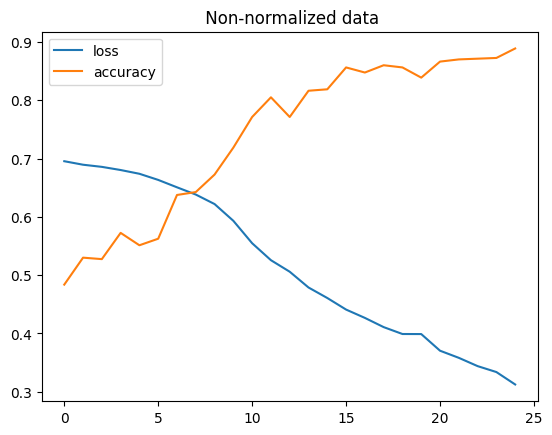

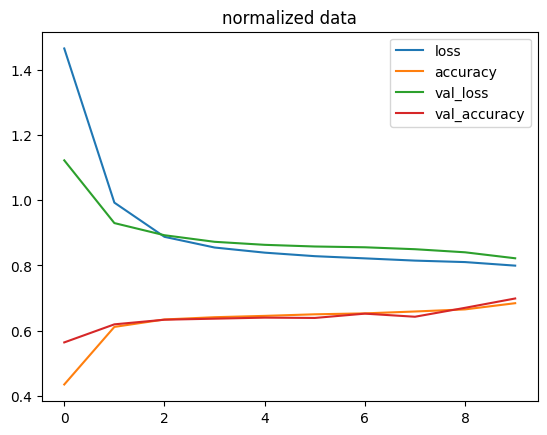

In [71]:
import pandas as pd
pd.DataFrame(history.history).plot(title=" Non-normalized data")
pd.DataFrame(history_nor.history).plot(title="normalized data")

In [72]:
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
lr_history = model.fit(train_data_nor,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_nor, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1777 - accuracy: 0.5921 - val_loss: 0.8547 - val_accuracy: 0.6960 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7738 - accuracy: 0.7087 - val_loss: 0.7501 - val_accuracy: 0.7089 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6942 - accuracy: 0.7419 - val_loss: 0.7278 - val_accuracy: 0.7359 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6435 - accuracy: 0.7674 - val_loss: 0.6555 - val_accuracy: 0.7596 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6176 - accuracy: 0.7750 - val_loss: 0.6567 - val_accuracy: 0.7648 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6022 - accuracy: 0.7793 - val_loss: 0.6248 - val_accuracy: 0.7732 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding the ideal learning rate')

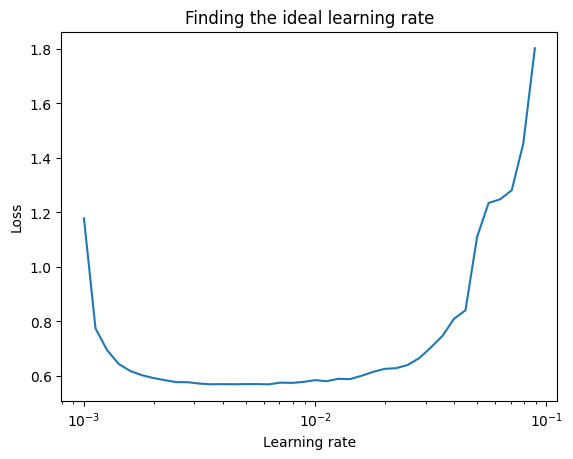

In [73]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [74]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size) 